
# Deep Learning

1. Kutubxonalarni import qilish

In [1]:
# 1. Kutubxonalarni import qilish
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50

2. Google Drive bilan ulanish

In [3]:
# Kaggle API sozlash
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# Datasetni yuklab olish
!kaggle datasets download -d dhamur/cotton-plant-disease

Dataset URL: https://www.kaggle.com/datasets/dhamur/cotton-plant-disease
License(s): ODbL-1.0
100% 3.98G/3.98G [03:16<00:00, 22.3MB/s]
100% 3.98G/3.98G [03:16<00:00, 21.7MB/s]


In [5]:
# Faylni zipdan chiqarish
import zipfile
import os

dataset_zip = "cotton-plant-disease.zip"
with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall("cotton_plant_disease")

In [6]:
# Fayl joylashuvini tekshirish
os.listdir("cotton_plant_disease")

['HOG_data',
 '5 Black and white',
 'Main dataset-20230209T191052Z-001',
 'Main dataset-20230209T170929Z-001',
 'HOG brighter',
 'Cotton leaves',
 'Cotton plant disease']

In [7]:
# Dataset joylashgan papkani belgilang
data_dir = "/content/cotton_plant_disease/Cotton leaves/40 Images"

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

(1440, 1920, 3)


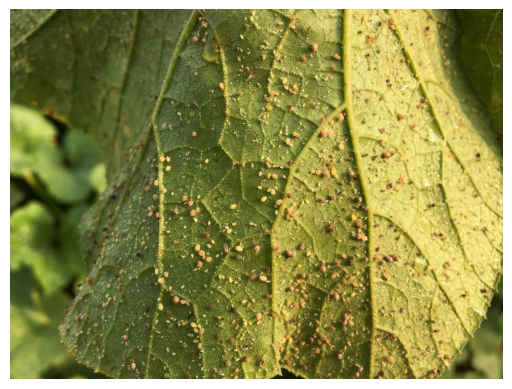

In [9]:
image_path = '/content/cotton_plant_disease/Cotton leaves/40 Images/Aphids/14.jpg'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()


In [10]:

image_path = '/content/cotton_plant_disease/Cotton leaves/40 Images/Aphids/14.jpg'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[132 133  73]
  [132 133  73]
  [123 127  68]
  ...
  [ 54  63  10]
  [ 52  62   9]
  [ 50  60   7]]

 [[139 140  80]
  [137 138  78]
  [126 130  71]
  ...
  [ 51  60   7]
  [ 50  60   7]
  [ 49  59   6]]

 [[143 144  86]
  [139 140  82]
  [127 130  73]
  ...
  [ 48  57   4]
  [ 47  57   4]
  [ 47  57   4]]

 ...

 [[145 147  72]
  [138 140  65]
  [134 137  60]
  ...
  [ 80  92  42]
  [ 81  93  43]
  [ 83  95  45]]

 [[137 139  64]
  [139 141  66]
  [139 142  65]
  ...
  [ 79  91  41]
  [ 79  91  41]
  [ 80  92  42]]

 [[126 128  53]
  [141 143  68]
  [148 151  74]
  ...
  [ 78  90  40]
  [ 76  88  38]
  [ 76  88  38]]]


In [11]:
img.shape

(1440, 1920, 3)

# 1-qism

In [ ]:
# Image Parameters
img_size = 224
batch_size = 32

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:

# # Image Data Generators
# data_gen = ImageDataGenerator(
#     rescale=1.0 / 255,
#     validation_split = 0.2  # Use 20% of data for validation
# )
data_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1.0 / 255,
    validation_split = 0.2,  # Use 20% of data for validation
    fill_mode='nearest')

In [ ]:
# # Train Generator
# train_generator = data_gen.flow_from_directory(
#     base_dir,
#     target_size=(img_size, img_size),
#     batch_size=batch_size,
#     subset='training',
#     class_mode='categorical'
# )
train_generator = data_gen.flow_from_directory(data_dir,
                                               target_size=(150, 150),
                                               batch_size=32,
                                               subset='training',
                                               class_mode='categorical')

Found 3831 images belonging to 6 classes.


In [ ]:
# Image Parameters
img_size = 150 # Changed the img_size to 150 to match the training data
batch_size = 32

# ... (rest of your code) ...


# Validation Generator
validation_generator = data_gen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),  # Changed target_size to (img_size, img_size)
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

# ... (rest of your code) ...

Found 957 images belonging to 6 classes.


# CNN - Convolutional Neural Network

In [ ]:
from tensorflow.keras import layers, models

In [ ]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

# model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │      21,233,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,254,854 (81.08 MB)

 Trainable params: 21,254,854 (81.08 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


119/119 ━━━━━━━━━━━━━━━━━━━━ 65s 474ms/step - accuracy: 0.2502 - loss: 2.6193 - val_accuracy: 0.5453 - val_loss: 1.1946
Epoch 2/5
  1/119 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.5938 - loss: 1.1507

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5938 - loss: 1.1507 - val_accuracy: 0.5172 - val_loss: 1.2350
Epoch 3/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 61s 355ms/step - accuracy: 0.5120 - loss: 1.2478 - val_accuracy: 0.5851 - val_loss: 1.0991
Epoch 4/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4062 - loss: 1.7732 - val_accuracy: 0.5862 - val_loss: 0.9901
Epoch 5/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 82s 364ms/step - accuracy: 0.5701 - loss: 1.1201 - val_accuracy: 0.6573 - val_loss: 0.9282


In [ ]:

# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 305ms/step - accuracy: 0.6398 - loss: 0.9648
Validation Accuracy: 64.33%


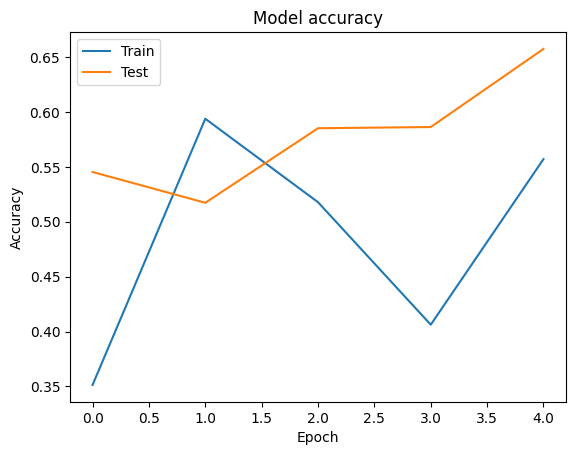

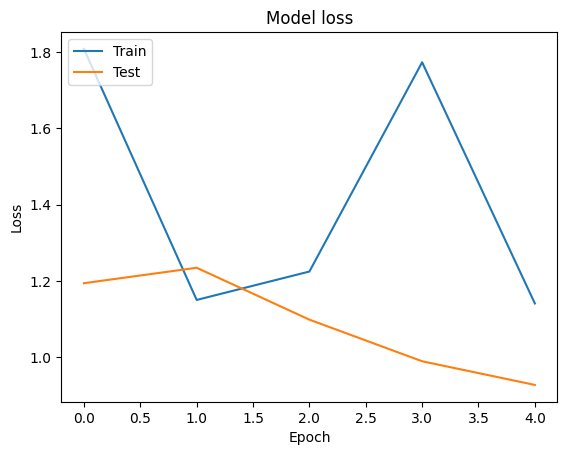

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Function to Load and Preprocess the Image using Pillow(Yostiq yordamida tasvirni yuklash va qayta ishlash funksiyasi)
def load_and_preprocess_image(image_path, target_size=(150, 150)): # Changed target_size to (150, 150)
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

In [ ]:

# Function to Predict the Class of an Image(Tasvir sinfini bashorat qilish funksiyasi)
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [ ]:

# Create a mapping from class indices to class names(Sinf indekslaridan sinf nomlarigacha xaritalash yarating)
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [ ]:
class_indices

{0: 'Aphids',
 1: 'Army worm',
 2: 'Bacterial blight',
 3: 'Healthy',
 4: 'Powdery mildew',
 5: 'Target spot'}

In [ ]:
import json
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step
Predicted Class Name:  Aphids 



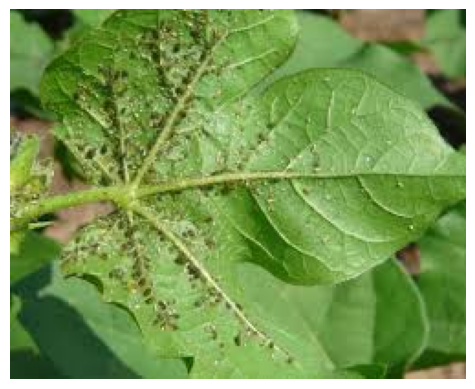

In [ ]:
from PIL import Image

# Example Usage
image_path = '/content/download.jpg'
#image_path = '/content/test_blueberry_healthy.jpg'
#image_path = '/content/test_potato_early_blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name: ", predicted_class_name, "\n")
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [ ]:
model.save('Cotton_disease_prediction_model.h5')

# Predict

In [ ]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# Saqlangan modelni yuklash
model = load_model('Cotton_disease_prediction_model.h5')

In [ ]:

# Yangi rasmni tayyorlash
def prepare_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.  # Normalizatsiya
    return img_array

In [ ]:
# Rasm yo'lini ko'rsating
img_path = '/content/download.jpg'

In [ ]:
# Rasmni tayyorlang (rasmning o'lchamini modelga moslang)
img = prepare_image(img_path, target_size=(224, 224))  # Eslatma: Target size modelga qarab o'zgarishi mumkin

In [ ]:
# Bashorat qilish
preds = model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


Predicted class: [0]
Probabilities: [0.5496091]
Raw predictions: [[0.5496091  0.06860213 0.18121178 0.03988124 0.03995611 0.12073957]]


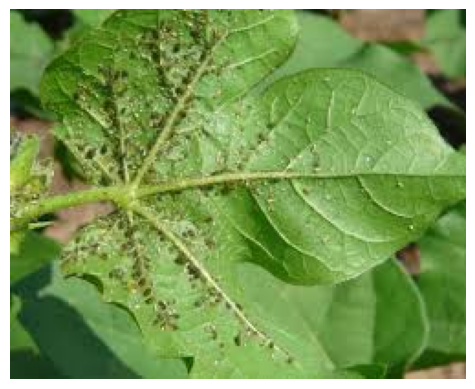

# 2-qism

In [12]:
import fastai
import torch

print(fastai.__version__)
print(torch.__version__)

2.7.18
2.5.1+cu121


In [13]:
from fastai.vision.all import *
from ipywidgets import widgets

# path - biz ishlatmoqchi bo'lgan papka haqida malumotni saqlaymiz va ishlatamiz
path = Path('/content/cotton_plant_disease/Cotton leaves/40 Images')

# files - path ni ichida nechta fayl yani rasmlarni yuklab olganligimiz haqida malumot
files = get_image_files(path)
# failed - bu fayni yani biror bir rasmni yuklashda muammo bo'lganda xabar beradi
failed = verify_images(path)

'PosixPath' object is not iterable


In [14]:
# datablock yaratib olamiz
aralash = DataBlock(
    # CategoryBlock - bu rasmlarimiz kategoriyalarga ajraltish
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    #splitter - bu datamizni train va test setlarga ajratib beradi
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    # parent_label - bu barcha rasmlarimiz uchun tepasiga class nomini yozib ishlatadi
    get_y = parent_label,
    # Resize - bu rasmlarimizni 224x224 o'lchamda to'g'rilab oladi, chunki ko'p modellar shu o'lchamda moslashgan
    item_tfms=Resize(224)
)

In [15]:
# downloaders yaratamiz
dls = aralash.dataloaders(path)

In [16]:
# O'qitish (train) - modelimizni foydaliligini ko'ramiz
# CNNlearner modeli - Convolutional Neural network
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(4)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 176MB/s]


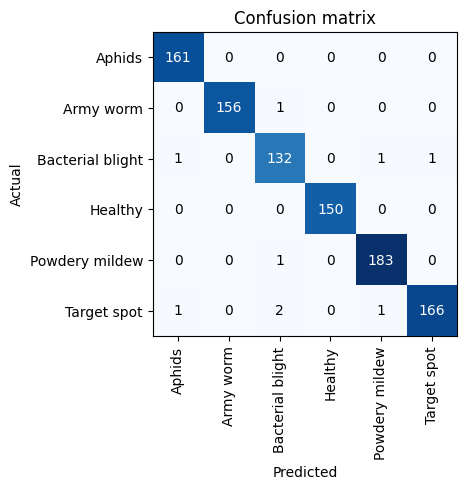

In [17]:
matritsa = ClassificationInterpretation.from_learner(learn)
matritsa.plot_confusion_matrix()

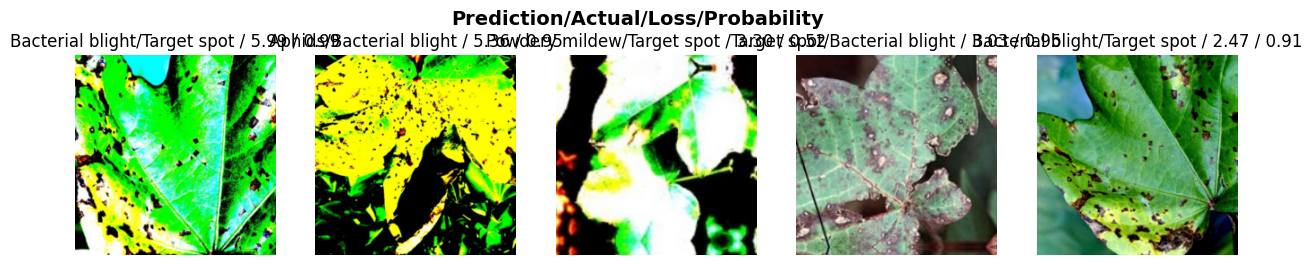

In [20]:
matritsa.plot_top_losses(5, nrows=1)

In [21]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Bashorat -> Target spot
Aniqlilik ehtimolligi -> 100.0 %


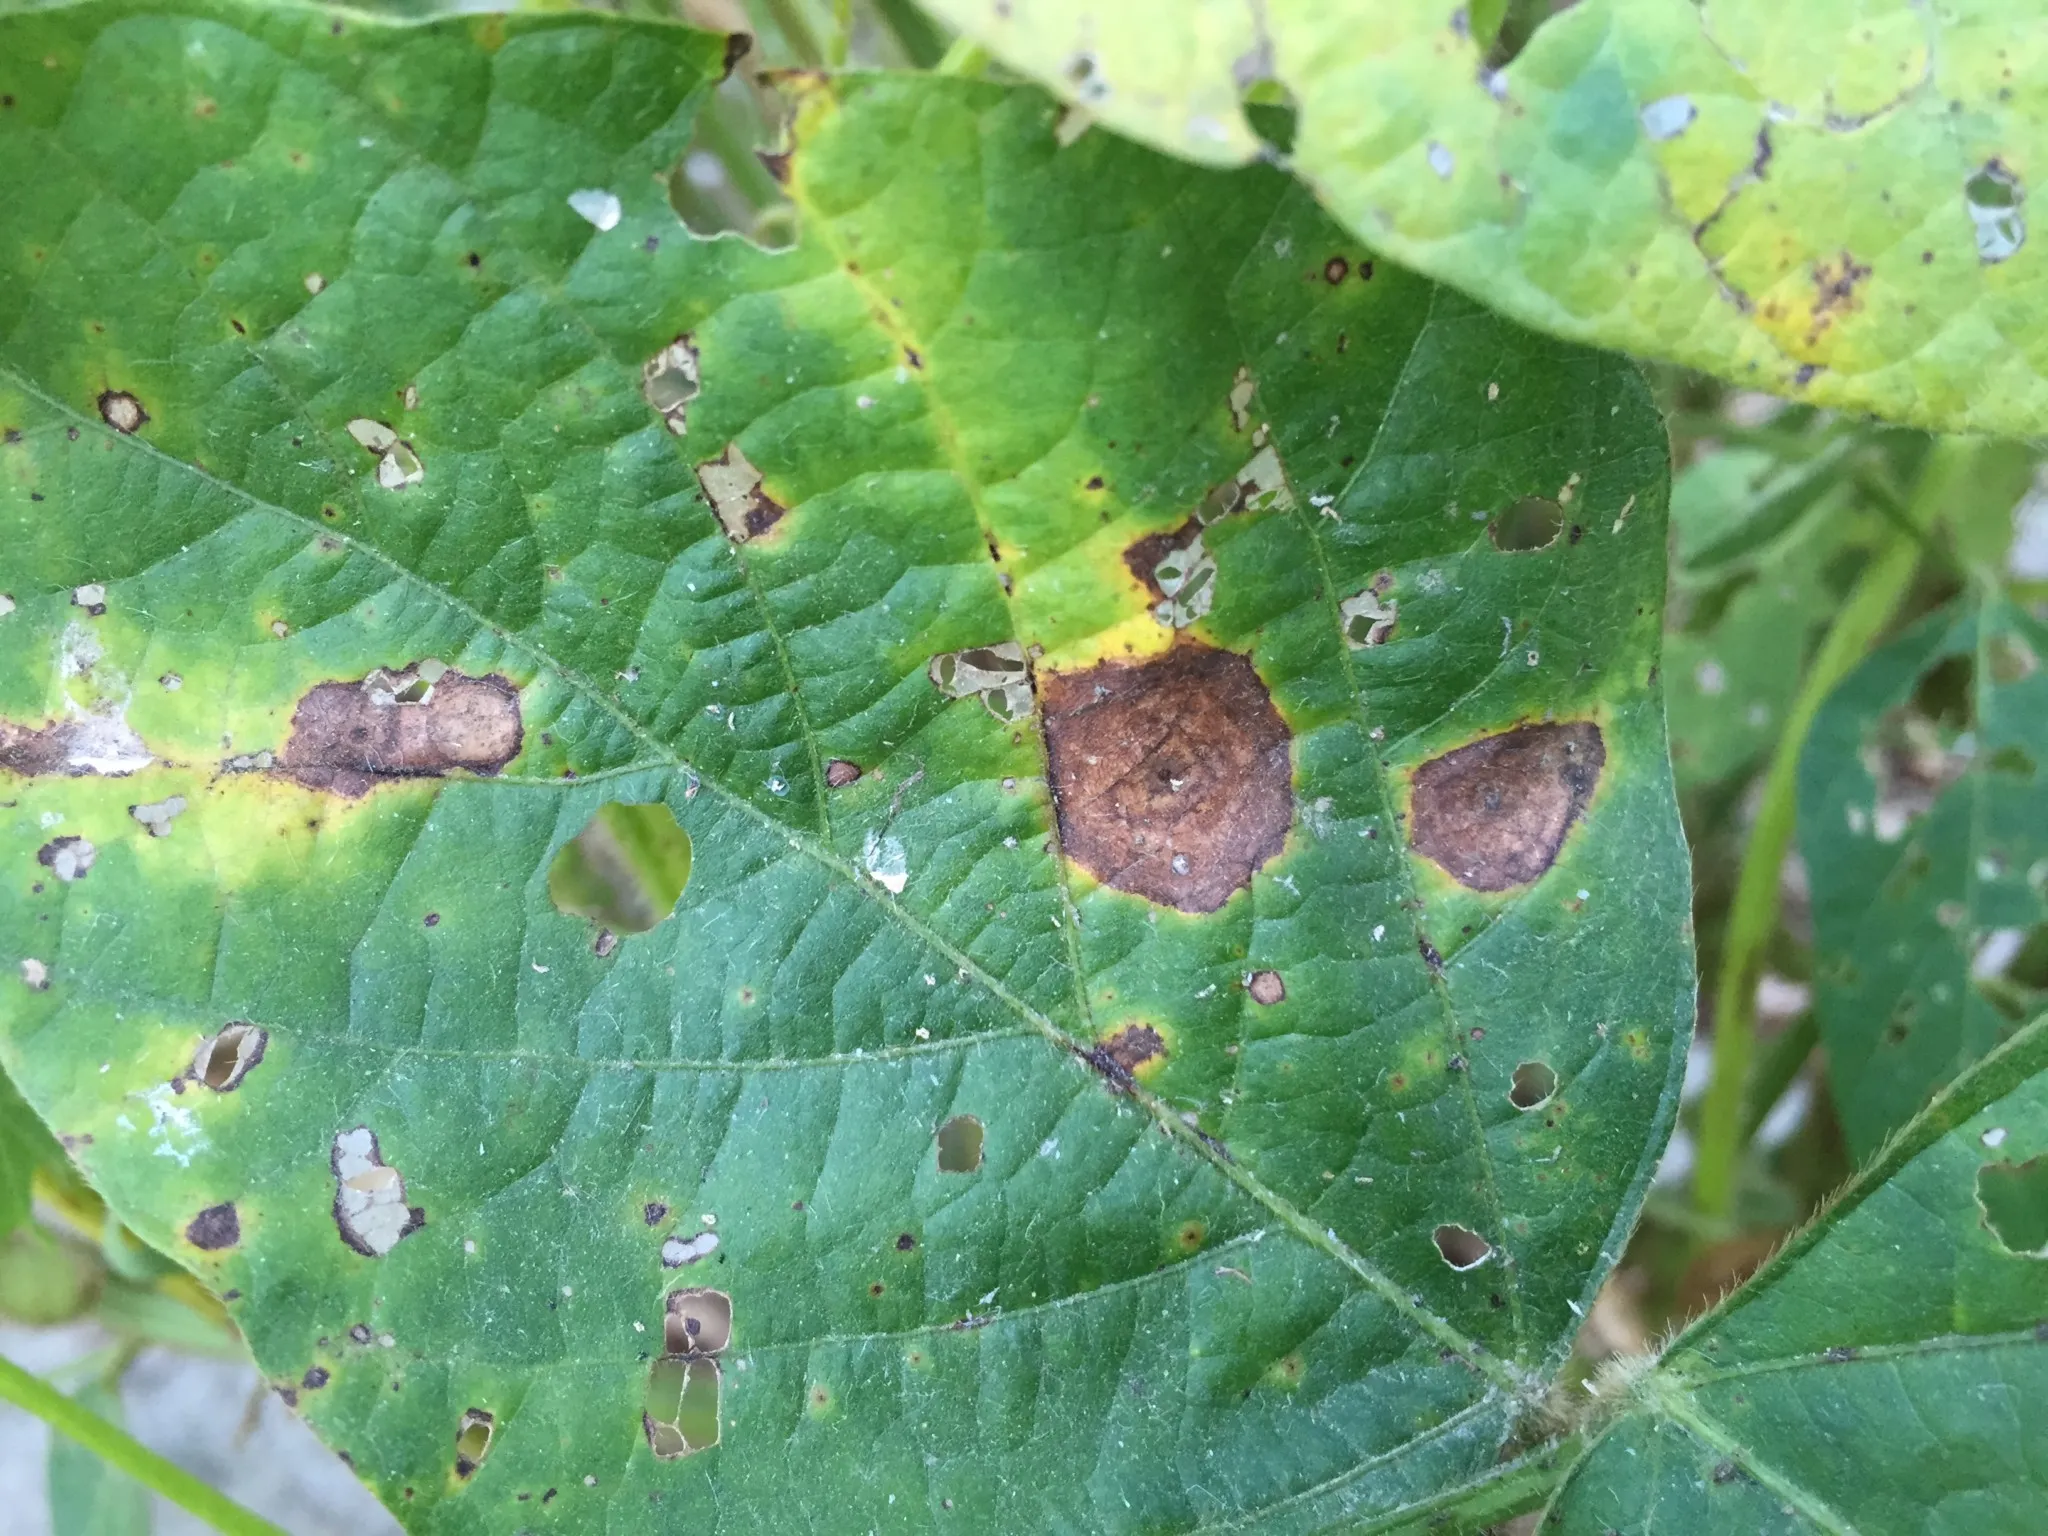

In [22]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = learn.predict(img)

print(f"Bashorat -> {pred}")
print(f"Aniqlilik ehtimolligi -> {probs[pred_id] * 100:.1f} %")
img

Model save-->

In [23]:
learn.export("aralash_model.pkl")